In [1]:
import numpy as np
import cvxpy as cp
import math as m
import matplotlib.pyplot as plt

In [2]:
e=[]
e=[5*m.sin(x*3*m.pi/100)+m.sin(x*10*m.pi/100) for x in range(1,101)]
e=np.array(e).reshape(100,1)
D1 = 0.08
D2 = 0.025
D3 = 0.005


In [3]:
h=cp.Variable((100,1))
u=h-e

def phi_fill(u):
  u_m1=cp.pos(u)
  return 2*(u_m1**2)+30*u_m1

def phi_cut(u):
  u_m2=cp.pos(-u)
  return 12*(u_m2**2)+u_m2

c=phi_fill(u)+phi_cut(u)
constraints=[cp.max(cp.abs(cp.diff(h.T,1)))<=D1,cp.max(cp.abs(cp.diff(h.T,2)))<=D2,cp.max(cp.abs(cp.diff(h.T,3)))<=D3]
penalty=cp.sum(c)
obj=cp.Minimize(penalty)
prob=cp.Problem(obj,constraints)
prob.solve(verbose = True, solver = cp.ECOS)
print(f"Cost_Value:",penalty.value)
print(f"Optimal Height of roadbed:",h.value)
print(f"Existing_Height:",e)

Cost_Value: 7562.8153114401985
Optimal Height of roadbed: [[2.51539403]
 [2.59539398]
 [2.67539395]
 [2.75539394]
 [2.83339463]
 [2.90439587]
 [2.96339754]
 [3.00539949]
 [3.02540161]
 [3.02040365]
 [2.99040558]
 [2.94040691]
 [2.8754077 ]
 [2.80040806]
 [2.72040814]
 [2.64040813]
 [2.56040815]
 [2.48040817]
 [2.4004082 ]
 [2.32040822]
 [2.24040824]
 [2.16040826]
 [2.08040828]
 [2.0004083 ]
 [1.92040832]
 [1.84040834]
 [1.76040837]
 [1.68040839]
 [1.60040841]
 [1.52040843]
 [1.44040845]
 [1.36040847]
 [1.28040849]
 [1.20040851]
 [1.12040853]
 [1.04040855]
 [0.96040857]
 [0.8804086 ]
 [0.80040862]
 [0.72040864]
 [0.64040866]
 [0.56040869]
 [0.48040871]
 [0.40040873]
 [0.32040863]
 [0.24040883]
 [0.16540968]
 [0.10041146]
 [0.05041433]
 [0.02041839]
 [0.0154226 ]
 [0.03542691]
 [0.07743068]
 [0.13643377]
 [0.20743601]
 [0.28543721]
 [0.36543722]
 [0.44543721]
 [0.5254372 ]
 [0.60543719]
 [0.68543718]
 [0.76543717]
 [0.84543716]
 [0.92543715]
 [1.00543714]
 [1.08543713]
 [1.16543712]
 [1.

Text(0, 0.5, 'h-e')

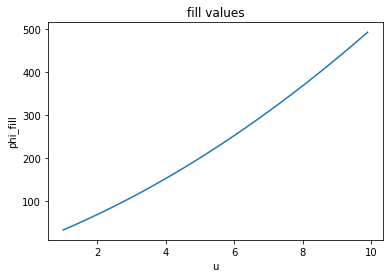

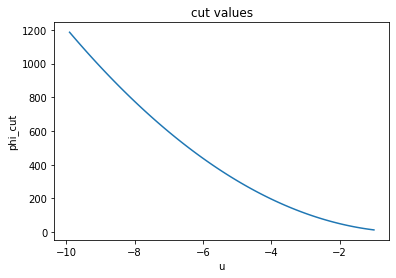

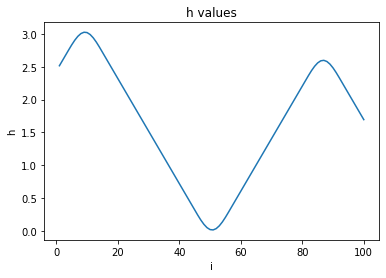

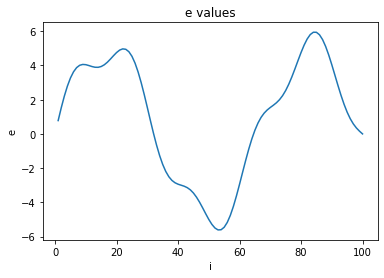

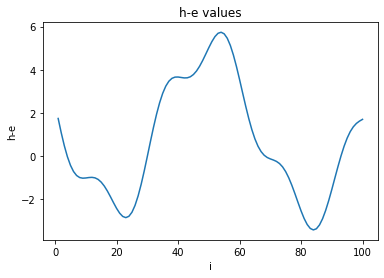

In [4]:
u_graph=np.arange(1,10,0.1)
i=range(1,101)
plt.figure(1)
plt.plot(u_graph,phi_fill(u_graph).value)
plt.title("fill values")
plt.xlabel('u')
plt.ylabel('phi_fill')

plt.figure(2)
plt.plot(-u_graph,phi_cut(-u_graph).value)
plt.title("cut values")
plt.xlabel('u')
plt.ylabel('phi_cut')

plt.figure(3)
plt.plot(i,h.value)
plt.title("h values")
plt.xlabel('i')
plt.ylabel('h')

plt.figure(4)
plt.plot(i,e)
plt.title("e values")
plt.xlabel('i')
plt.ylabel('e')

plt.figure(5)
plt.plot(i,h.value-e)
plt.title("h-e values")
plt.xlabel('i')
plt.ylabel('h-e')



From the graph of cut values and fill values we can say that they are both convex functions